In [1]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** В этой задаче вам нужно исследовать свойства плотности.

Для перечисленных ниже распределений нужно
1). На основе графиков плотности для различных параметров пояснить, за что отвечает каждый параметр.
2). Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.

Распределения:
* Нормальное (для этого распределения ниже дается большая часть кода, решение также было разобрано на презентации)
* Равномерное
* Экспоненциальное
* Гамма-распределение
* Бета-распределение

Функция, рисующая график плотности с заданными параметрами

In [2]:
def show_pdf(pdf, xmin, xmax, ymax, grid_size=100, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    pdf -- плотность
    xmin, xmax -- границы графика по оси x
    ymax -- граница графика по оси y
    grid_size -- размер сетки, по которой рисуется график
    kwargs -- параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)
    
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=3)
    plt.grid(ls=':')
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    plt.show()

# Нормальное распределение

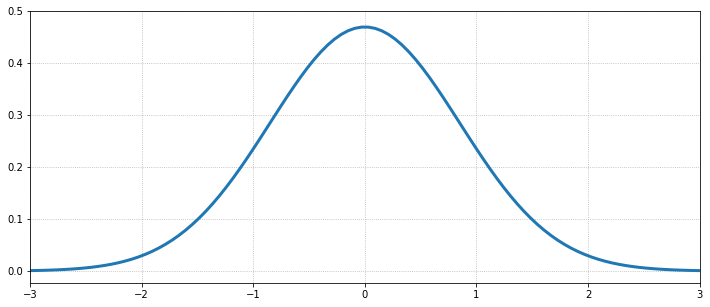

In [3]:
show_pdf(sps.norm.pdf, -3, 3, 0.5, scale=0.85)

In [4]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.norm.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=1.0, description='ymax', max=2.0), IntSlider(value=100, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=10.0, min=-10.0), FloatSlider(value=1.0, description='scale', max=2.0, min=0.01, step=0.01)))

Output()

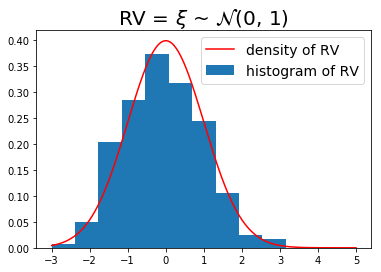

In [5]:
grid = np.linspace(-3, 5, 1000) 
sample = sps.norm.rvs(size=200)
plt.figure()
plt.hist(sample, range=(-3, 5), bins=13, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density of RV')  # color - цвет графика
plt.title(r'RV = $\xi$ ~ $\mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

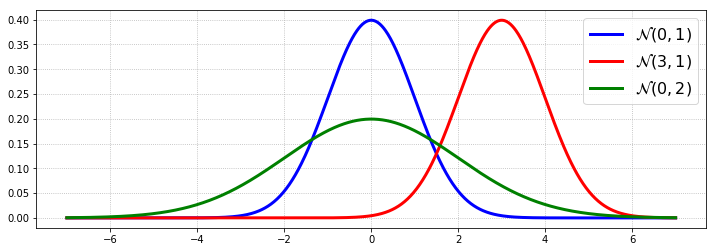

In [6]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 0]  # набор значений параметра a
sigma_list = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 4))
for i, (a, sigma, color) in enumerate(zip(a_list, sigma_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), color=color, lw=3, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.

Будем рассматривать нормальное распределение на примере следующей жизненной модели: измерение роста людей в некотором городе. Более формально, за нормально распределенную случайную величину берем численное значение роста человека. 

Для нормального распределения:
* параметр $\mathcal{loc = a}$ отвечает за смещение кривой вдоль $\mathcal{Ox}$, тем самым определяя положение оси симметрии плотности распределения. Вероятность того, что точка $х$ попадет в отрезок $\mathcal{[m; n]}$, равна площади участка, зажатого кривой, $\mathcal{Ox}$ и прямыми $\mathcal{x = m}$, $\mathcal{x = n}$. В точке $a$ значение плотности распределения наибольшее, соответственно вероятность того, что значение случайной величины, имеющей нормальное распределение, попадет в окрестность точки $а$ - наибольшая. Также заметим, что относительно прямой $\mathcal{x = a}$ график кривой симметричен, соответственно средневзвешенное значение случайной величины равно $a$, ведь значения $a+x$ и $a-x$ случайная величина принимает с равной вероятностью. По определению, $a$ - это ни что иное как значение математического ожидания. В терминах нашей жизненной модели: параметр $a$ отвечает за то, что скорее всего случайно выбранный человек имеет рост, численно равный $a$. Также средний рост жителей города равен $a$.
* параметр $\mathcal{scale = \sigma}$ отвечает за смещение экстремума вдоль  $\mathcal{Oy}$ и "прижимание" кривой к прямой  $\mathcal{x = a}$, тем самыми увеличивая концентрацию вероятности в окрестности точки $а$. При уменьшении параметра $\sigma$ увеличивается вероятность того, что нормально распределенная случайная величина будет равна $a$. Это соответствует мере разброса значений случайной величины относительно её математического ожидания, иными словами - дисперсии $\sigma$<sup>2</sup>. В терминах нашей жизненной модели: параметр $\sigma$ отвечает за то, что рост случайно выбранного человека очень близок к среднему росту, то есть к $a$. Чем меньше $\sigma$, тем больше вероятность того, что рост этого человека близок к $a$.

* отдельно стоит сказать про величины $a$ - $\sigma$, $a$ + $\sigma$. В этих точках график кривой терпит перегибы: на отрезке  $\mathcal{[a - \sigma; a + \sigma]}$ график кривой выпуклый, а на крайних лучах - вогнутый. Это иллюстрирует тот факт, что плотность вероятности начинает убывать "быстрее", чем равномерно (это следует из определения вогнутости - кривая окажется ниже любой хорды). Более содержательно обратить внимание на "Правило трех сигм", которое гласит: вероятность того, что случайная величина отклонится от своего математического ожидания на большую величину, чем утроенное среднее квадратичное отклонение, почти достоверно равна нулю. В терминах нашей жизненной модели это означает, что скорее всего в городе не найдется человека с ростом, численное значение которого не лежит в $\mathcal{[a - 3\sigma; a + 3\sigma]}$

# Равномерное распределение


In [7]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.uniform.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
                         loc=widgets.FloatSlider(min=-4, max=0, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=1.4, description='ymax', max=2.0), IntSlider(value=100, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=0.0, min=-4.0), FloatSlider(value=1.0, description='scale', max=4.0, min=0.01, step=0.01)))

Output()

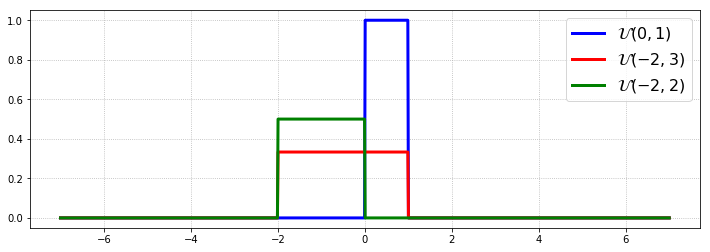

In [8]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, -2, -2]  # набор значений параметра a
b_list = [1, 3, 2]  # набор значений параметра b

plt.figure(figsize=(12, 4))
for i, (a, b, color) in enumerate(zip(a_list, b_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.uniform(a, b).pdf(grid), color=color, lw=3, 
             label='$\mathcal{U}' + '({}, {})$'.format(a, b))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

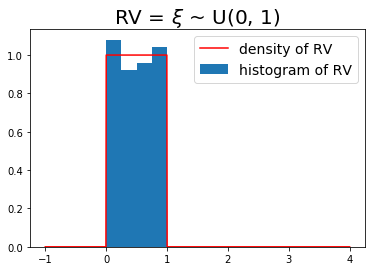

In [9]:
grid = np.linspace(-1, 4, 1000)  # сетка для построения графика
sample = sps.uniform.rvs(size=200)
plt.figure()
plt.hist(sample, range=(-1, 4), bins=20, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.uniform.pdf(grid), color='red', label='density of RV')  # color - цвет графика
plt.title(r'RV = $\xi$ ~ U(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

**Вывод:**
значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.

Будем рассматривать равномерное распределение на примере следующей жизненной модели: возьмем отрезок времени $\mathcal{[21:00; 22:00]}$ и автомобиль, который гарантированно проедет мимо нас за это время. В качестве равномерно распределенной случайной величины возьмем момент времени, в который автомобиль проедет мимо. 

Для равномерного распределения:
* параметр $\mathcal{loc = a}$ - определяет начало отрезка, на котором случайная величина равномерно распределена. В нашей модели это начало периода времени, который мы рассматриваем.
* параметр $\mathcal{scale = b-a}$ - определяет длину отрезка, на котором задана случайная величина. Значение плотности распределения на данном отрезке обратно пропорционально данному параметру, то есть длине этого отрезка. Чем меньше длина отрезка, тем больше значение плотности вероятности на отрезке. В терминах нашей жизненной модели это означает, что через $b-a$ минут автомобиль гарантированно уже проедет мимо нас, причем проехать он может в любой момент (равновероятно) из данного отрезка времени. 

# Экспоненциальное распределение

In [10]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.expon.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=175),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
                         loc=widgets.FloatSlider(min=-4, max=0, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax', max=10.0)))

HBox(children=(FloatSlider(value=1.4, description='ymax', max=2.0), IntSlider(value=175, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=0.0, description='loc', max=0.0, min=-4.0), FloatSlider(value=1.0, description='scale', max=4.0, min=0.01, step=0.01)))

Output()

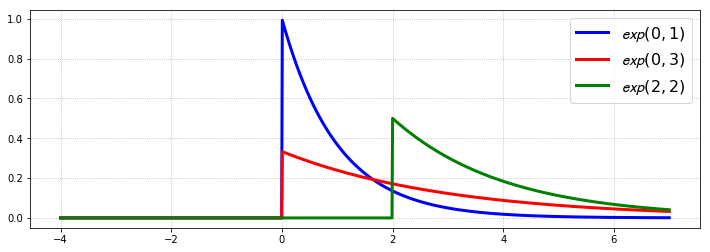

In [11]:
grid = np.linspace(-4, 7, 1000)  # сетка для построения графика
loc_list = [0, 0, 2]  # набор значений параметра a
scale_list = [1, 3, 2]  # набор значений параметра b

plt.figure(figsize=(12, 4))
for i, (loc, scale, color) in enumerate(zip(loc_list, scale_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.expon(loc, scale).pdf(grid), color=color, lw=3, 
             label='$\mathcal{exp}' + '({}, {})$'.format(loc, scale))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

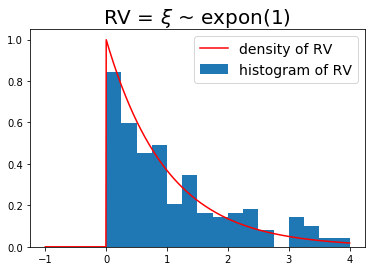

In [12]:
grid = np.linspace(-1, 4, 1000) 
sample = sps.expon.rvs(size=200)
plt.figure()
plt.hist(sample, range=(-1, 4), bins=20, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.expon.pdf(grid), color='red', label='density of RV')  # color - цвет графика
plt.title(r'RV = $\xi$ ~ expon(1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

**Вывод:**
значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.

Будем рассуждать об экспоненциальном распределении в следующих терминах: представим, что мы продавец в магазине. Время между появлениями двух последовательных покупателей примем за случайную величину с экспоненциальным распределением. Параметры будем описывать для случая $\mathcal{[0; +∞)}$. <br> 
P.S.: данный жизненный пример соответствует именно экспоненциальному распределению, потому что покупатели приходят в магазин случайно, но с некоторой фиксированной средней интенсивностью (в нашей модели). Количество времени, уже затраченное нами на ожидание покупателя, не влияет на время, которое нам ещё придётся прождать следующего покупателя. Формально: $\mathcal{P(X \gt s+t | X \geq s) = P(X \gt t)}$. Относительно несложно показать, что данному условию удовлетворяет только экспоненциальное распределение.

Для экспоненциального распределения exp(λ):
* параметр $λ$ - определяет кривизну кривой и начальное значение плотности вероятности в правой окрестности нуля.  Чем больше $λ$, тем больше площади под кривой в правой окрестности нуля. Значит, чем больше $λ$, тем вероятнее, что время между приходом покупателей будет мало и, как следствие, они будут чаще приходить. Делаем вывод, что $λ$  - это среднее число новых покупателей за единицу времени, иными словами - частота прихода покупателей. Отметим, что $1/λ$ - среднее время между приходом двух последовательных покупателей. По определению, это математическое ожидание, то есть $1/λ$ - среднее время ожидания нового покупателя.

# Гамма распределение


In [13]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.gamma.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=100, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
                         a = widgets.FloatSlider(min=0, max=100, step=0.1, value=2),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, description='xmax')))

HBox(children=(FloatSlider(value=1.4, description='ymax', max=2.0), IntSlider(value=100, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=2.0, description='a'), FloatSlider(value=1.0, description='scale', max=4.0, min=0.01, step=0.01)))

Output()

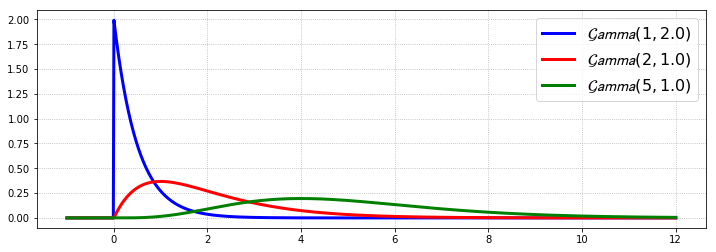

In [14]:
grid = np.linspace(-1, 12, 1000)  # сетка для построения графика
a_list = [1, 2, 5]
scale_list = [0.5, 1, 1] 
plt.figure(figsize=(12, 4))
for i, (a, scale, color) in enumerate(zip(a_list, scale_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.gamma(a, 0, scale).pdf(grid), color=color, lw=3, 
             label='$\mathcal{Gamma}' + '({}, {})$'.format(a, 1.0/scale))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

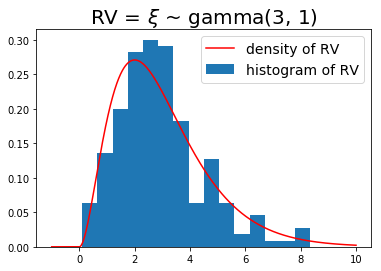

In [15]:
grid = np.linspace(-1, 10, 1000) 
sample = sps.gamma.rvs(a=3, size=200)
plt.figure()
plt.hist(sample, range=(-1, 10), bins=20, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.gamma.pdf(grid, a=3), color='red', label='density of RV')  # color - цвет графика
plt.title(r'RV = $\xi$ ~ gamma(3, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

**Вывод:**
значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.

К сожалению, подобрать удачную модель, на которой было бы понятно проилюстрировано значение параметров распределения,  оказалось затруднительно. 

Для гамма-распределения gamma($\alpha$, $\beta$):
* параметр $\alpha$ -отвечает за положение экстремума кривой, с увеличением $\alpha$ область под экстремумом (на графике выглядит как горб) переносится вправо вдоль Ох. Соответственно, чем больше $\alpha$, тем большие значения случайная величина будет принимать чаще. 
* параметр $\beta$ - также отвечает за положение экстремума кривой, но описанное выше поведение будет верно для уменьшения параметра $\beta$. Помимо этого, в обоих случаях с переносом экстремума вправо его значение уменьшается, распределение становится более равномерным. 

# Бета распределение


In [16]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.beta.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-1, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=2, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=10, step=0.1, value=3),
                         a = widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                         b = widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-4, max=4, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

HBox(children=(FloatSlider(value=-1.0, description='xmin', max=0.0, min=-1.0), FloatSlider(value=2.0, description='xmax', max=2.0)))

HBox(children=(FloatSlider(value=3.0, description='ymax', max=10.0), IntSlider(value=100, description='grid_size', max=300, min=25, step=25)))

HBox(children=(FloatSlider(value=1.0, description='a', max=10.0), FloatSlider(value=1.0, description='b', max=10.0)))

Output()

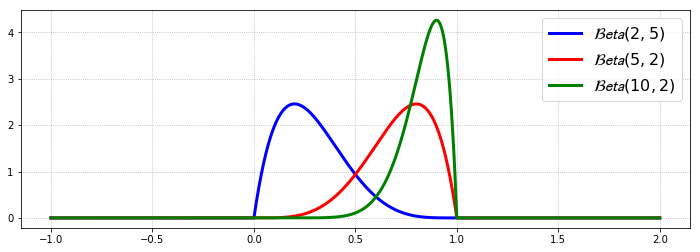

In [17]:
grid = np.linspace(-1, 2, 1000)  # сетка для построения графика
a_list = [2, 5, 10]
b_list = [5, 2, 2]
loc_list = [0, 0, 0]  
scale_list = [1, 1, 1] 

plt.figure(figsize=(12, 4))
for i, (a, b, loc, scale, color) in enumerate(zip(a_list, b_list, loc_list, scale_list, ['b', 'r', 'g'])):
    plt.plot(grid, sps.beta(a, b, loc, scale).pdf(grid), color=color, lw=3, 
             label='$\mathcal{Beta}' + '({}, {})$'.format(a, b))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

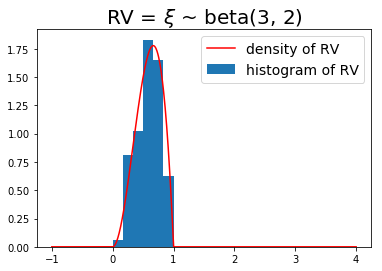

In [18]:
grid = np.linspace(-1, 4, 1000) 
sample = sps.beta.rvs(a=3, b=2, size=200)
plt.figure()
plt.hist(sample, range=(-1, 4), bins=30, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.beta.pdf(grid, a=3, b=2), color='red', label='density of RV')  # color - цвет графика
plt.title(r'RV = $\xi$ ~ beta(3, 2)', fontsize=20)
plt.legend(fontsize=14, loc=1)

plt.show()

**Вывод:**
значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.

К сожалению, подобрать удачную модель, на которой было бы понятно проилюстрировано значение параметров распределения,  оказалось затруднительно. 

Прежде всего отметим, что кривые ведут себя симметрично относительно прямой x = 0.5 при перестановке значений параметров. 

Интересно отметить, что при $\alpha$ = 1, $\beta$ = 1 данное распределение совпадает с равномерным на [0, 1].

Для beta-распределения beta($\alpha$, $\beta$):
* параметр $\alpha$: с ростом данного параметра экстремум смещается вправо вдоль Ох и его значение при этом увеличивается. 
* параметр $\beta$: аналогично, с ростом данного параметра экстремум смещается влево вдоль Ох и его значение при этом увеличивается.

***Вывод по гистограммам:***

для каждого из построенных распределений гистограмма выборки из 200 случайных величин примерно совпадает с областью под графиком плотности соответствующего распределения. Это подтверждает интуитивный смысл определения плотности распределения - чем чаще случайная величина попадает в окрестность некоторой точки, тем выше соответствующий столбец гистограммы и, очевидно, плотность распределения в окрестности данной точки также выше.  

**Задача 2.** Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [19]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    return (coin(np.hstack((size, precision)))/(2.**(np.arange(precision)+1))).sum(axis=np.array(size).size)

Для $U[0, 1]$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Сколько бросков монеты пришлось совершить?

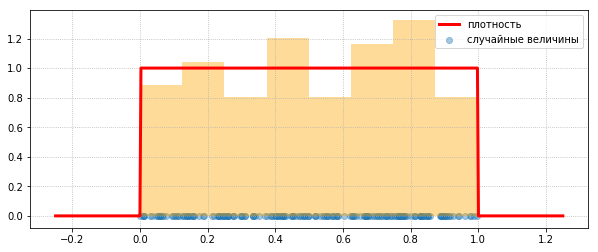

In [20]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision=50)

plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size), alpha=0.4, label='случайные величины')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=8, normed=True, alpha=0.4, color='orange')
# рисуем график плотности
plt.plot(grid, sps.uniform.pdf(grid), 
         color='red', lw=3, label='плотность')
plt.legend()
plt.grid(ls=':')
plt.show()

Используя выводы задачи 1, понимаем, что реализованная нами функция uniform работает правильно, так как построенная гистограмма похожа на область под графиком плотности равномерного распределения. 
Для генерирования 200 равномерно распределенных случайных величин с точностью n = 50 понадобилось 200*50 = 10000 "подбрасываний монет", так как для одной случайной величины требуется 50 подбрасываний. 

Исследуйте, как меняются значения случайных величин в зависимости от precision.

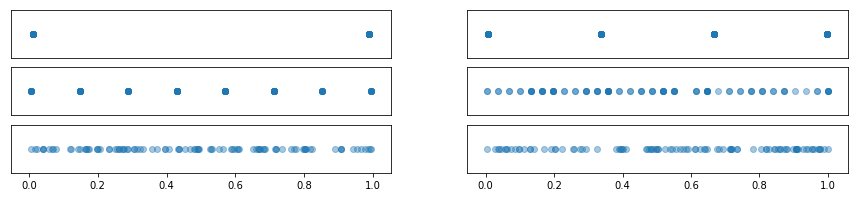

In [21]:
size = 100

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(uniform(size, precision), 
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

с увеличением точности генерации равномерно распределенной случайной величины увеличивается диапазон принимаемых ею значений. <br>
* precision = 1: для генерации $\xi$ ~ $\mathcal{U(0, 1)}$ задействовано одно подбрасывание монеты, поэтому $\xi$ может принимать всего два значения - на графике это проиллюстрировано $\leq$ $\mathcal{min(2, size)}$ точками.

* precision = 2: для генерации $\xi$ ~ $\mathcal{U(0, 1)}$ задействовано два подбрасывания монеты, поэтому $\xi$ может принимать четыре значения - на графике это проиллюстрировано $\leq$ $\mathcal{min(4, size)}$ точками.

* precision = 3: для генерации $\xi$ ~ $\mathcal{U(0, 1)}$ задействовано три подбрасывания монеты, поэтому $\xi$ может принимать восемь значений - на графике это проиллюстрировано $\leq$ $\mathcal{min(8, size)}$ точками.

* precision = 5: для генерации $\xi$ ~ $\mathcal{U(0, 1)}$ задействовано пять подбрасываний монеты, поэтому $\xi$ может принимать 32 значения - на графике это проиллюстрировано $\leq$ $\mathcal{min(32, size)}$ точками.

* precision = 10: для генерации $\xi$ ~ $\mathcal{U(0, 1)}$ задействовано десять подбрасывания монеты, поэтому $\xi$ может принимать 1024 значения - на графике это проиллюстрировано $\leq$ $\mathcal{min(1024, size)}$ точками.

* precision = 30: для генерации $\xi$ ~ $\mathcal{U(0, 1)}$ задействовано тридцать подбрасываний монеты, поэтому $\xi$ может принимать $2^{30}$ значений - на графике это проиллюстрировано $\leq$ $\mathcal{min(2^{30}, size)}$ точками.

Получаем следующую зависимость: $\mathcal{|Range(\xi)| = 2^{precision}}$ , причем необязательно, что $\xi$ в результате $\mathcal{size = 100}$ экспериментов примет полный диапазон своих возможных значений.

*Часть 2.* Напишите функцию генерации случайных величин в количестве `size` штук (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [22]:
def normal(size=1, loc=0, scale=1, precision=30):
    
    #если размерность size равна 1, то для удобства приводим size к tuple
    if type(size) != tuple:
        s = (size, )
    else:
        s = size
        
    #генерируем равномерно распределенные случайные величины
    xi = uniform(int((np.prod(s)-np.prod(s)%2)/2), precision)
    teta = uniform(int((np.prod(s)-np.prod(s)%2)/2), precision)
    
    #защищищаемся от случая, когда teta = 0, потому что в этом случае далее берется ln(0)
    teta = teta + 0.5**(precision+5)
    
    #вычисляем тригонометрические множители из преобразования Бокса-Мюллера
    factor_cos = np.cos(2*np.pi*xi)
    factor_sin = np.sin(2*np.pi*xi)
    
    #вычисляем общий множитель из преобразования Бокса-Мюллера
    factor_sqrt = np.sqrt(-2*np.log(teta))
    
    #вычисляем значения нормально распределенных случайных величин
    part1 = factor_cos*factor_sqrt
    part2 = factor_sin*factor_sqrt
    
    #рассматриваем случай, когда от функции требуют нечетную выборку
    if np.prod(s)%2 == 1:
        #отдельно вычисляем еще одно значение случайной величины
        xi = uniform(1, precision)
        teta = uniform(1, precision)
        add = np.cos(2*np.pi*xi)*np.sqrt(-2*np.log(teta))
        #объединение полученных выборок
        result = np.hstack((part1, part2, add))
        return result.reshape(s)
    else:
        #объединение полученных выборок
        result = np.hstack((part1, part2))
        return result.reshape(s)
    

Для $\mathcal{N}(0, 1)$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам. Сколько бросков монеты пришлось совершить?

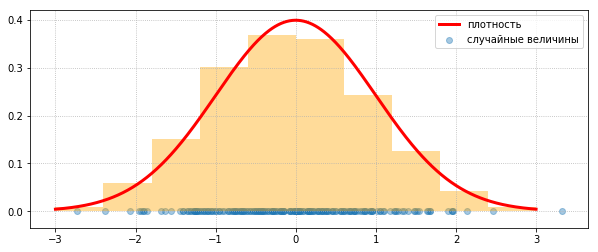

In [23]:
size = 200
sample = normal(size)
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size), alpha=0.4, label='случайные величины')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=10, range = (-3, 3), normed=True, alpha=0.4, color='orange')
# рисуем график плотности
plt.plot(grid, sps.norm.pdf(grid), 
         color='red', lw=3, label='плотность')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

имея возможность сгенерировать равномерно распределенную случайную величину, можно сгенерировать нормально распределенную случайную величину при помощи преобразований Бокса-Мюллера. Используя выводы задачи 1, понимаем, что реализованная нами функция normal работает правильно, так как построенная гистограмма похожа на область под графиком плотности нормального распределения. Для генерирования 200 нормально распределенных случайных величин с точностью n = 50 понадобилось 200 $\times$ 50 = 10000 "подбрасываний монет", так как для двух нормально распределенных случайных величин требуется две равномерно распределенные случайные величины, а для каждой из равномерно распределенных случайных величин нужно 50 подбрасываний монет.

*Часть 3.* Теперь напишите функцию генерации выборки многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня от матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

Исследуйте, как меняются значения случайных величин в зависимости от precision.

In [24]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [25]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    specter = eigh(cov_matrix)[0]
    D = specter*np.array([[1, 0], [0, 1]])
    D = np.sqrt(D)
    B = eigh(cov_matrix)[1] @ D
    normal_rv = normal(size*mean.size, precision).reshape(mean.size, size)
    return mean + (B@(normal_rv)).transpose()


Сгенерируйте 200 случайных векторов из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите сгенерированные точки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

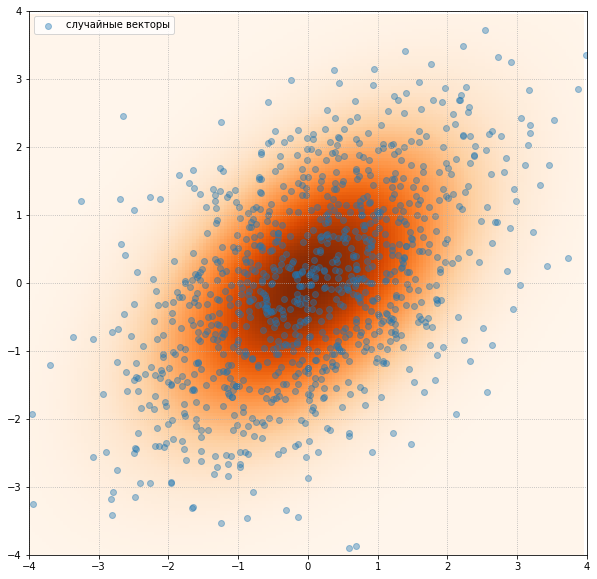

In [26]:
size = 1000
mean = [0, 0]
cov_matrix=[[2,1], [1,2]]
sample = gauss(mean, cov_matrix, size=1000)  # Генерация векторов
grid = np.mgrid[-4:4:0.05, -4:4:0.05]
c = np.hstack((grid[0].reshape(grid[0].size, 1), grid[1].reshape(grid[1].size, 1))).reshape(len(grid[0]), len(grid[0]), 2)
density = sps.multivariate_normal.pdf(c, mean=mean, cov=cov_matrix)
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='случайные векторы')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

по построенному графику видно, что случайная величина, имеющая многомерное нормальное распределение, чаще принимает значения в местах бОльшей плотности данного распределения. Значит, мы верно реализовали функцию генерации случайных величин, имеющих многомерное распределение.

*Еще одна часть задачи.* Вы уже научились генерировать случайные величины из равномерного распределения. Напишите функцию генерации случайных величин из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [27]:
def expon(size=1, lambd=1, precision=30):
    return -(np.log(1-uniform(size, precision))/lambd)

Для $Exp(1)$ сгенерируйте 200 независимых случайных величин, постройте график плотности на отрезке $[-0.5, 5]$, а также гистограмму по сгенерированным случайным величинам. 

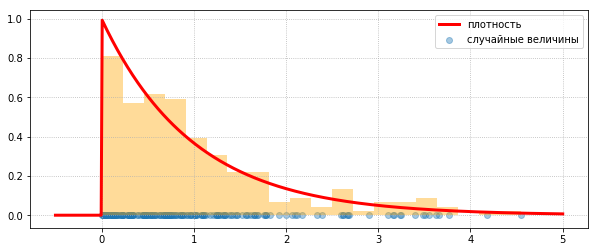

In [28]:
size = 200
sample = expon(size)
grid = np.linspace(-0.5, 5, 500)

plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size), alpha=0.4, label='случайные величины')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=20, normed=True, alpha=0.4, color='orange')
# рисуем график плотности
plt.plot(grid, sps.expon.pdf(grid), 
         color='red', lw=3, label='плотность')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

При помощи генерации равномерно распределенной случайной величины можно сгенерировать экспоненциально распределенную случайную величину.

Пусть $\xi$ ~ U(0, 1), $\eta$ =  $\large{\frac{-ln(1-\xi)}{\lambda}}$. Тогда:

$F_{\eta}$(x) = P($\eta$ $\leq$ x)= P($\large{\frac{-ln(1-\xi)}{\lambda}}$ $\leq$ x) = P($-ln(1-\xi)$ $\leq$ $\lambda$x) = P($ln(1-\xi)$ $\geq$ -$\lambda$x) = P($1-\xi$ $\geq$ $\exp^{-\lambda x}$) = P($\xi$ $\leq$ 1 - $\exp^{-\lambda x}$) = 1 - $\exp^{-\lambda x}$ = $F_{\eta}$(x).

Получаем, что $\eta$ ~ expon($\lambda$). Мы использовали тот факт, что для $\xi$ ~ U(0, 1) функция распределения $F_{\xi}$(x) = x

В следующих задачах для генерации случайных величин можно использовать библиотеку `scipy.stats`.

**Задача 3.** В этой задаче нужно визуализировать *закон больших чисел*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $\mathcal{N}(a, \sigma^2)$. Согласно закону больших чисел выполнена сходимость $\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\to} a$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов среднее в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждому из них посчитайте среднее $X_{jn} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть среднее по первым $n$ величинам $j$-го набора. При написании кода может помочь функция `numpy.cumsum(axis=...)`.

Для каждого $j$ нанесите на один график зависимость $X_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Выполните те же действия для распределений $Exp(1)$ и $Pois(1)$.

Сделайте вывод о смысле закона больших чисел. Подтверждают ли сделанные эксперименты теоретические свойства?

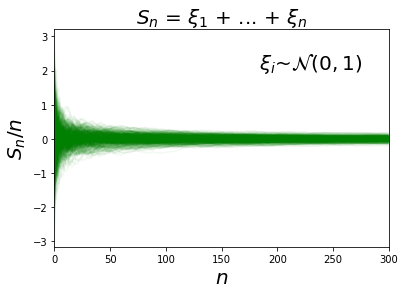

In [29]:
rv = sps.norm.rvs
set_of_rv = rv(size=(500,300))
sums = set_of_rv.cumsum(axis = 1)
a = np.arange(300) + 1
result = sums/a
plt.figure()
plt.ylim(result.min(), result.max()) 
plt.xlim(0, 300)
result = result.transpose()
plt.plot(result, color='green', alpha = 0.05)  # color - цвет графика
plt.xlabel(r'$n$', fontsize=20)
plt.text(230, result.max()-1, r'$\xi_i$' + r'~' + '$\mathcal{N}' + '({}, {})$'.format(0, 1),
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.ylabel(r'$S_n/n$', fontsize=20)
plt.title(r'$S_n$ = $\xi_1$ + ... + $\xi_n$', fontsize=20)
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 нормально распределенных случайных величин. На данном графике изображена зависимость среднего арифметического частичных сумм соответствующих случайных величин от количества слагаемых в этой сумме. По графику видно, что с увеличением числа слагаемых каждая из 500 кривых все ближе "прижимается" к прямой y = 0. Математическое ожидание $\mathcal{N(0, 1)}$ равно нулю, соответственно построенный график подтверждает закон больших чисел с точностью до 300 испытаний.

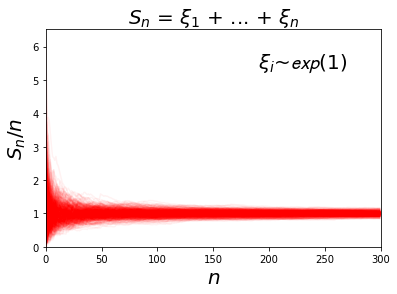

In [30]:
rv = sps.expon.rvs
set_of_rv = rv(size=(500,300))
sums = set_of_rv.cumsum(axis = 1)
a = np.arange(300) + 1
result = sums/a
plt.figure()
plt.ylim(result.min(), result.max()) 
plt.xlim(0, 300)
result = result.transpose()
plt.plot(result, color='red', alpha = 0.05)  # color - цвет графика
plt.xlabel(r'$n$', fontsize=20)
plt.text(230, result.max()-1, r'$\xi_i$' + r'~' + '$\mathcal{exp}' + '({})$'.format(1),
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.ylabel(r'$S_n/n$', fontsize=20)
plt.title(r'$S_n$ = $\xi_1$ + ... + $\xi_n$', fontsize=20)
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 экспоненциально распределенных случайных величин. На данном графике изображена зависимость среднего арифметического частичных сумм соответствующих случайных величин от количества слагаемых в этой сумме. По графику видно, что с увеличением числа слагаемых каждая из 500 кривых все ближе "прижимается" к прямой y = 1. Математическое ожидание $\mathcal{expon(1)}$ равно 1, соответственно построенный график подтверждает закон больших чисел с точностью до 300 испытаний.

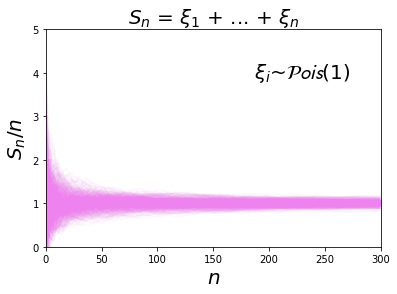

In [31]:
rv = sps.poisson.rvs
set_of_rv = rv(size=(500,300), mu=1)
sums = set_of_rv.cumsum(axis = 1)
a = np.arange(300) + 1
result = sums/a
plt.figure()
plt.ylim(result.min(), result.max()) 
plt.xlim(0, 300)
result = result.transpose()
plt.plot(result, color='violet', alpha = 0.05)  # color - цвет графика
plt.xlabel(r'$n$', fontsize=20)
plt.text(230, result.max()-1, r'$\xi_i$' + r'~' + '$\mathcal{Pois}' + '({})$'.format(1),
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.ylabel(r'$S_n/n$', fontsize=20)
plt.title(r'$S_n$ = $\xi_1$ + ... + $\xi_n$', fontsize=20)
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 пуассоновски распределенных случайных величин. На данном графике изображена зависимость среднего арифметического частичных сумм соответствующих случайных величин от количества слагаемых в этой сумме. По графику видно, что с увеличением числа слагаемых каждая из 500 кривых все ближе "прижимается" к прямой y = 1. Математическое ожидание  $\mathcal{Pois(1)}$ равно 1, соответственно построенный график подтверждает закон больших чисел с точностью до 300 испытаний.

**Вывод:**

Для $\mathcal{N}$ (0, 1) имеем $\mu$ = 0. <br>
Для $\mathcal{Pois}$ (1) имеем $\mu$ = 1.  <br>
Для $\mathcal{expon}$ (1) имеем $\mu$ = 1.

Из построенных графиков мы видим, что при увеличении числа испытаний среднее значение случайной величины все больше приближается к прямой $y$ = $\mu$, где $\mu$ - значение математического ожидания данного распределения. Это именно то, что утверждает закон больших чисел - среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения. Таким образом, мы экспериментально подтвердили закон больших чисел для трех распределений по 500 выборок в каждом, точность составляет 300 испытаний.

Сделанные эксперименты подтверждают теоретические свойства - с увеличением n кривые приближаются к $\mu$.
Закон больших чисел экспериментально подтвержден как для абсолютно непрерывных, так и для дискретных распределений.

**Задача 4.** В этой задаче нужно визуализировать *центральную предельную теорему*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}$.

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

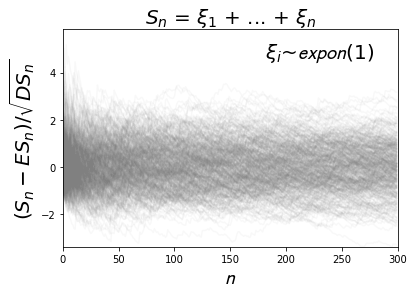

In [32]:
rv = sps.expon.rvs
set_of_rv = rv(size=(500,300))
set_of_mean = np.array([set_of_rv.mean()]*500*300).reshape(500, 300)
set_of_var = np.array([set_of_rv.var()]*500*300).reshape(500, 300)

sums_of_rv = set_of_rv.cumsum(axis = 1)
sums_of_mean = set_of_mean.cumsum(axis = 1)
sums_of_var = np.sqrt(set_of_var.cumsum(axis = 1))

result = (sums_of_rv - sums_of_mean)/sums_of_var
plt.figure()
plt.ylim(result.min(), result.max()) 
plt.xlim(0, 300)
result = result.transpose()
plt.plot(result, color='grey', alpha = 0.05)  # color - цвет график

plt.xlabel(r'$\mathcal{n}$', fontsize=20)
plt.text(230, result.max()-1, r'$\xi_i$' + r'~' + '$\mathcal{expon}' + '({})$'.format(1),
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.ylabel(r'$(S_n - ES_n)/$' + r'$\sqrt{DS_n}$', fontsize=20)
plt.title(r'$S_n$ = $\xi_1$ + ... + $\xi_n$', fontsize=20)

plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 экспоненциально распределенных случайных величин. На данном графике изображена зависимость величины $(S_n - ES_n)/$$\sqrt{DS_n}$ от количества слагаемых в этой сумме, сделано это для 500 выборок. По графику видно, что с увеличением числа слагаемых кривые не сходятся к определенной константе.

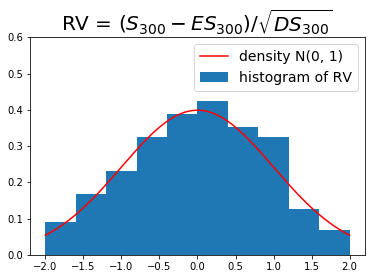

In [33]:
grid = np.linspace(-2, 2, 1000) 
sample = result[299]
plt.figure()
plt.hist(sample, range=(-2, 2), bins=10, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density N(0, 1)')  # color - цвет графика
plt.ylim(0, 0.6)
plt.title(r'RV = $(S_{300} - ES_{300})/$' + r'$\sqrt{DS_{300}}$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

На данном графике изображена гистограмма, построенная по 500 значениям случайных величин $(S_{300} - ES_{300})/$$\sqrt{DS_{300}}$, где $S_{300}$ = $\xi_1$ + ... + $\xi_{300}$, каждая величина $\xi_{i}$ имеет экспоненциальное распределение. Также на данном графике изображена кривая, соответствующая плотности нормального распределения с параметрами 0 и 1. Нетрудно заметить, что построенная гистограмма примерно совпадает с областью под графиком плотности нормального распределения.

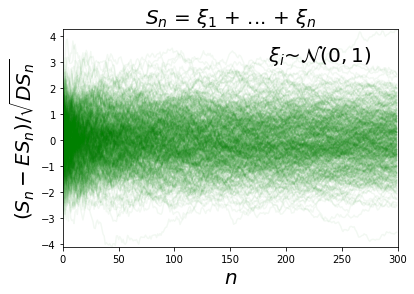

In [34]:
rv = sps.norm.rvs
set_of_rv = rv(size=(500,300))
set_of_mean = np.array([set_of_rv.mean()]*500*300).reshape(500, 300)
set_of_var = np.array([set_of_rv.var()]*500*300).reshape(500, 300)

sums_of_rv = set_of_rv.cumsum(axis = 1)
sums_of_mean = set_of_mean.cumsum(axis = 1)
sums_of_var = np.sqrt(set_of_var.cumsum(axis = 1))

result = (sums_of_rv - sums_of_mean)/sums_of_var
plt.figure()
plt.ylim(result.min(), result.max()) 
plt.xlim(0, 300)
result = result.transpose()
plt.plot(result, color='green', alpha = 0.05)  # color - цвет график

plt.xlabel(r'$n$', fontsize=20)
plt.text(230, result.max()-1, r'$\xi_i$' + r'~' + '$\mathcal{N}' + '({}, {})$'.format(0, 1),
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.ylabel(r'$(S_n - ES_n)/$' + r'$\sqrt{DS_n}$', fontsize=20)
plt.title(r'$S_n$ = $\xi_1$ + ... + $\xi_n$', fontsize=20)

plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 нормально распределенных случайных величин. На данном графике изображена зависимость величины $(S_n - ES_n)/$$\sqrt{DS_n}$ от количества слагаемых в этой сумме, сделано это для 500 выборок. По графику видно, что с увеличением числа слагаемых кривые не сходятся к определенной константе.

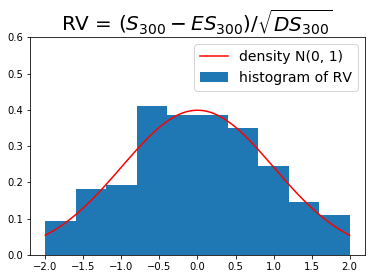

In [35]:
grid = np.linspace(-2, 2, 1000) 
sample = result[299]
plt.figure()
plt.hist(sample, range=(-2, 2), bins=10, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density N(0, 1)')  # color - цвет графика
plt.ylim(0, 0.6)
plt.title(r'RV = $(S_{300} - ES_{300})/$' + r'$\sqrt{DS_{300}}$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

На данном графике изображена гистограмма, построенная по 500 значениям случайных величин $(S_{300} - ES_{300})/$$\sqrt{DS_{300}}$, где $S_{300}$ = $\xi_1$ + ... + $\xi_{300}$, каждая величина $\xi_{i}$ имеет нормальное распределение. Также на данном графике изображена кривая, соответствующая плотности нормального распределения с параметрами 0 и 1. Нетрудно заметить, что построенная гистограмма примерно совпадает с областью под графиком плотности нормального распределения.

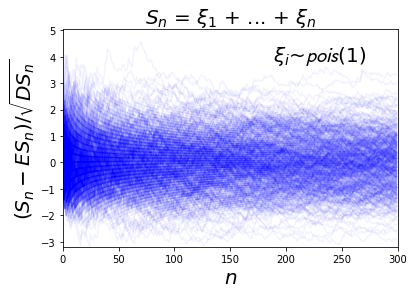

In [36]:
rv = sps.poisson.rvs
set_of_rv = rv(size=(500,300), mu=1)
set_of_mean = np.array([set_of_rv.mean()]*500*300).reshape(500, 300)
set_of_var = np.array([set_of_rv.var()]*500*300).reshape(500, 300)

sums_of_rv = set_of_rv.cumsum(axis = 1)
sums_of_mean = set_of_mean.cumsum(axis = 1)
sums_of_var = np.sqrt(set_of_var.cumsum(axis = 1))

result = (sums_of_rv - sums_of_mean)/sums_of_var
plt.figure()
plt.ylim(result.min(), result.max()) 
plt.xlim(0, 300)
result = result.transpose()
plt.plot(result, color='blue', alpha = 0.05)  # color - цвет график

plt.xlabel(r'$n$', fontsize=20)
plt.text(230, result.max()-1, r'$\xi_i$' + r'~' + '$\mathcal{pois}' + '({})$'.format(1),
         fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.ylabel(r'$(S_n - ES_n)/$' + r'$\sqrt{DS_n}$', fontsize=20)
plt.title(r'$S_n$ = $\xi_1$ + ... + $\xi_n$', fontsize=20)

plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 пуассоновски распределенных случайных величин. На данном графике изображена зависимость величины $(S_n - ES_n)/$$\sqrt{DS_n}$ от количества слагаемых в этой сумме, сделано это для 500 выборок. По графику видно, что с увеличением числа слагаемых кривые не сходятся к определенной константе.

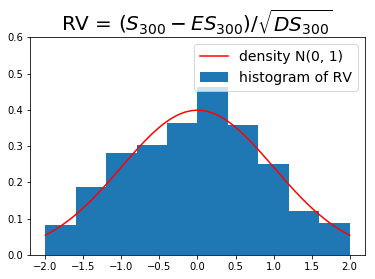

In [37]:
grid = np.linspace(-2, 2, 1000) 
sample = result[299]
plt.figure()
plt.hist(sample, range=(-2, 2), bins=10, normed=True, label='histogram of RV')  # normed - нормированный
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density N(0, 1)')  # color - цвет графика
plt.ylim(0, 0.6)
plt.title(r'RV = $(S_{300} - ES_{300})/$' + r'$\sqrt{DS_{300}}$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

На данном графике изображена гистограмма, построенная по 500 значениям случайных величин $(S_{300} - ES_{300})/$$\sqrt{DS_{300}}$, где $S_{300}$ = $\xi_1$ + ... + $\xi_{300}$, каждая величина $\xi_{i}$ имеет пуассоновское распределение. Также на данном графике изображена кривая, соответствующая плотности нормального распределения с параметрами 0 и 1. Нетрудно заметить, что построенная гистограмма примерно совпадает с областью под графиком плотности нормального распределения.

**Вывод:**

Как уже было сказано выше, мы экспериментально установили, что кривые $(S_{n} - ES_{n})/$$\sqrt{DS_{n}}$ с увеличением числа n не сходятся к какой-то константе. Это не противоречит центральной предельной теореме, ведь если бы кривые сходились по распределению к определенной константе, то они бы не сходились к нормально распределенной случайной величине, так как функция распределения случайной величины $\xi$ = C имеет следующий вид:

\begin{equation*}
F_\xi(x) = 
 \begin{cases}
   0 &\text{if x < C}\\
   1 &\text{if x $\geq$ C}
 \end{cases}
\end{equation*}

Данная функция распределения, очевидно, не совпадает с функцией нормального распределения.

Рассмотрим построеные гистограммы. Во всех трех распределениях (как в дискретных, так и в абсолютно непрерывных) гистограмма примерно совпадает с областью под графиком функции плотности нормального распределения. В задаче №1 мы убедились, что гистограмма, построенная по выборке из нормально распределенных случайных величин, похожа на область под графиком функции плотности нормального распределения. Из этого мы делаем вывод, что $(S_{300} - ES_{300})/$$\sqrt{DS_{300}}$ сходится по распределению к нормально распределенной случайной величине (точность составляет 300 испытаний, величина выборки - 500). <br> 

Данный вывод подтверждает теоретический смысл центральной пределеьной теоремы: $(S_{n} - ES_{n})/$$\sqrt{DS_{n}}$ $\rightarrow$ $\mathcal{N}$(0, 1) при n $\rightarrow$ $\infty$.
В итоге имеем, что независимо от распределения $\xi_{i}$ (главное, чтобы они были независимы и одинаково распределены), величина $(S_{n} - ES_{n})/$$\sqrt{DS_{n}}$ асимптотически ведет себя как нормально распределенная случайная величина.